In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
### We have to find a better way to work with this.
import sys
sys.path.append('/Volumes/MacBookHD/Projects/PyPharmer_devel/') #Path for Angel in ashrey
#sys.path.append ('/home/angel/Documents/Angel/Projects/PyPharmer_devel/') #path for Angel in balmunt 
#sys.path.append('/home/diego/Trabajo/Proyectos/PyPharmer_devel/') # path for Diego
import matplotlib as mt
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import PyPharmer as phr
import simplejson as json
from pprint import pprint

In [3]:
# Matplotlib options
%matplotlib inline
#mt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 12, 8

In [4]:
json_file1='../Test_Systems/Pharmacophores/Set02/ZINCpharmer.json'
json_file2='../Test_Systems/Pharmacophores/Set02/pharmit.json'
json_file3='../Test_Systems/Pharmacophores/Set01/gold_soln_l2199_3D_H_Ch_m1_4.json'

In [5]:
ph3=json.loads(open(json_file3).read())
ph2=json.loads(open(json_file2).read())
ph1=json.loads(open(json_file1).read())

In [6]:
tmp_json_keys = ph2.keys ()
tmp_json = ph2

## Extracting descriptors and vectors

descriptors_list={ 'Hydrophobic':        1.0,\
             'HydrogenAcceptor':    2.0,\
             'HydrogenDonor':       3.0,\
             'Aromatic':            4.0,\
             'NegativeIon':         5.0,\
             'PositiveIon':         6.0,\
             'InclusionSphere':     7.0,\
             'Other':               8.0,\
             'PhenylalanineAnalog': 9.0,\
             'LeuValAnalog':        10.0 \
             }

if 'points' in tmp_json_keys:
    
                descriptors=[]
        
                for json_object in tmp_json.get ('points'):
                    
                
                    if json_object.get ('enabled')==True:
                        name=descriptors_list[json_object.get ('name')]
                        vector=json_object.get ('vector')
                        vector_on=json_object.get ('vector_on')
                        
                        if 'vector' and 'vector_on' in json_object.keys ():
                            if vector_on ==1:
                                for element in vector:
                                    descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                                        element['x'], element['y'],element['z']])
                                descriptors.append (descriptor)
        
                        if 'vector' and 'vector_on' in json_object.keys ():
                            if vector_on ==0:
                                vector=[0]
                                descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                              vector[0],vector[0],vector[0]])
                                descriptors.append (descriptor)
                           
                        if 'vector' and not 'vector_on' in json_object.keys ():
                            if vector!=None:
                                for element in vector:
                                    descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                                element['x'], element['y'],element['z']])
                                descriptors.append (descriptor)
                            if vector==None:
                                vector=[0]
                                descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                              vector[0],vector[0],vector[0]])
                                descriptors.append (descriptor)
                                
                descriptors.append (descriptor)
                points=np.array (descriptors)
                pprint (point)

## Extracting descriptors and svectors 
(mistake; we need vectors)

descriptors={ 'Hydrophobic':        1.0,\
             'HydrogenAcceptor':    2.0,\
             'HydrogenDonor':       3.0,\
             'Aromatic':            4.0,\
             'NegativeIon':         5.0,\
             'PositiveIon':         6.0,\
             'InclusionSphere':     7.0,\
             'Other':               8.0,\
             'PhenylalanineAnalog': 9.0,\
             'LeuValAnalog':        10.0 \
             }

descriptors=[]
for point in ph2.get ('points'):
    if point.get ('enabled')==False:
        if 'svector' in point.keys ():
            svector=point.get ('svector')
            if svector!=None:
                name=descriptors[point.get('name')]
                print ([name,point.get ('x'),point.get ('y'),point.get ('z'),point.get ('radius'), 
                    svector.get('x'),svector.get('y'),svector.get('z')])
            if svector== None:
                svector=[0]
                print ([name,point.get ('x'),point.get ('y'),point.get ('z'),point.get ('radius'),
                    svector[0],svector[0],svector[0]])

## Testing the library

In [7]:
data=phr.Descriptors (input_file=json_file2,select='enabled')

In [8]:
data.points

array([[  2.   ,  -3.185, -14.222,  18.329,   0.5  ,   0.   ,   0.   ,
          0.   ],
       [  2.   ,  -3.322, -13.493,  17.204,   0.5  ,   0.   ,   0.   ,
          0.   ],
       [  2.   ,  -0.221, -12.367,  18.577,   0.5  ,   0.   ,   0.   ,
          0.   ],
       [  2.   ,   1.328, -10.176,  19.161,   0.5  ,   0.   ,   0.   ,
          0.   ],
       [  2.   ,   3.464, -10.507,  19.754,   0.5  ,   0.   ,   0.   ,
          0.   ],
       [  1.   ,  -4.172, -15.224,  18.653,   1.   ,   0.   ,   0.   ,
          0.   ],
       [  1.   ,  -4.172, -15.224,  18.653,   1.   ,   0.   ,   0.   ,
          0.   ]])

In [9]:
x=[]
y=[]
z=[]
for element in data.points:
    if element[0]==2.0:
        x.append (element[1])
        y.append (element[2])
        z.append (element[3])

In [10]:
print (x,y,z)

[-3.185, -3.322, -0.221, 1.328, 3.464] [-14.222, -13.493, -12.367, -10.176, -10.507] [18.329, 17.204, 18.577, 19.161, 19.754]


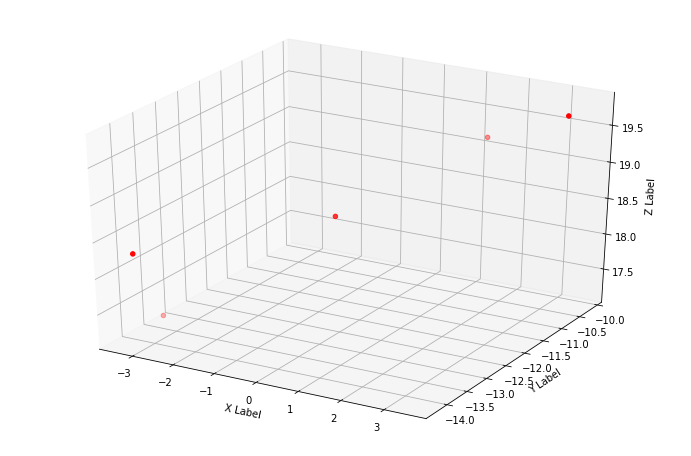

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='red')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()